In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the data
data = pd.read_excel("/content/PCOS_data_without_infertility.xlsx")

In [ ]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,242.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,23.929752,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,3.663177,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,15.100000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.900000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.000000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,25.975000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
data.shape

(541, 42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     242 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Sl. No', 'Patient File No.', 'Unnamed: 44']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')


In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=data.columns)

In [ ]:
data.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [ ]:
# Prepare data for modeling
x = data.drop(columns=['PCOS (Y/N)'])
y = data['PCOS (Y/N)']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RandomForestClassifier model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

Feature ranking:
1. feature 37 (0.195725) - Follicle No. (L)
2. feature 36 (0.149274) - BP _Diastolic (mmHg)
3. feature 29 (0.049052) - hair growth(Y/N)
4. feature 28 (0.042458) - Weight gain(Y/N)
5. feature 22 (0.040306) - TSH (mIU/L)
6. feature 27 (0.039086) - RBS(mg/dl)
7. feature 9 (0.030942) - Cycle(R/I)
8. feature 16 (0.028701) - FSH(mIU/mL)
9. feature 8 (0.025447) - Hb(g/dl)
10. feature 1 (0.022012) -  Age (yrs)
11. feature 24 (0.021156) - PRL(ng/mL)
12. feature 21 (0.020838) - Waist:Hip Ratio
13. feature 23 (0.020175) - AMH(ng/mL)
14. feature 32 (0.019805) - Pimples(Y/N)
15. feature 38 (0.019179) - Follicle No. (R)
16. feature 0 (0.019150) - PCOS (Y/N)
17. feature 18 (0.018870) - FSH/LH
18. feature 15 (0.018691) - II    beta-HCG(mIU/mL)
19. feature 39 (0.017629) - Avg. F size (L) (mm)
20. feature 10 (0.017522) - Cycle length(days)
21. feature 25 (0.017144) - Vit D3 (ng/mL)
22. feature 7 (0.015998) - RR (breaths/min)
23. feature 19 (0.015808) - Hip(inch)
24. feature 13 (0.015609

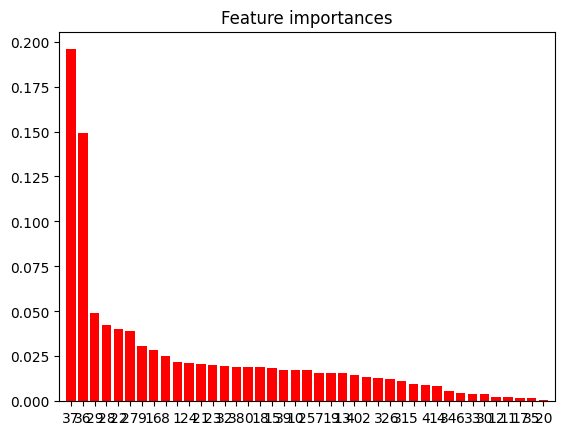

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Get the indices of the features sorted by importance
indices = importances.argsort()[::-1]

# Print the feature ranking
# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], data.columns[indices[f]]))


# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

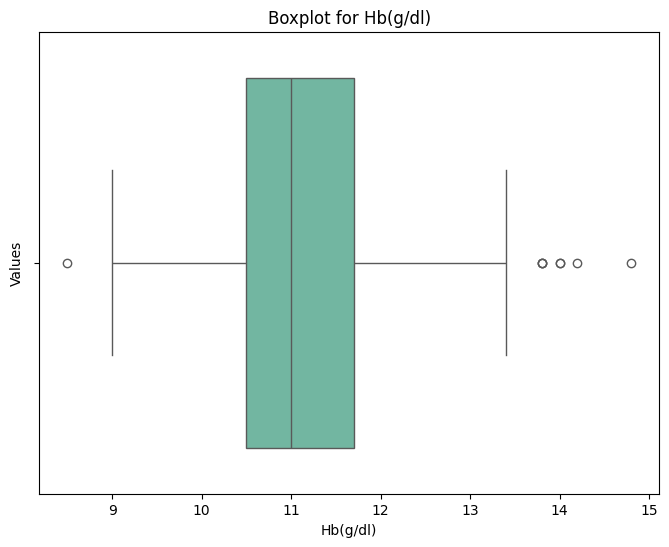

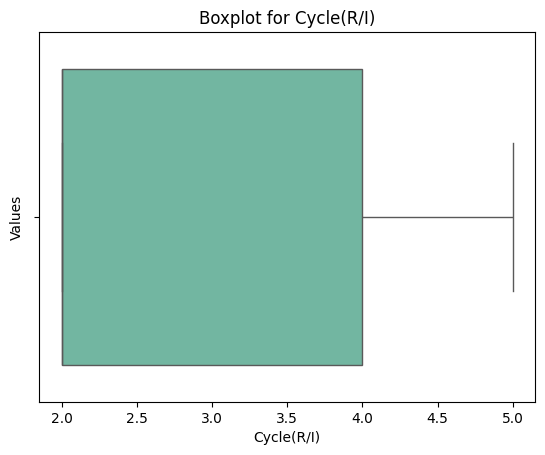

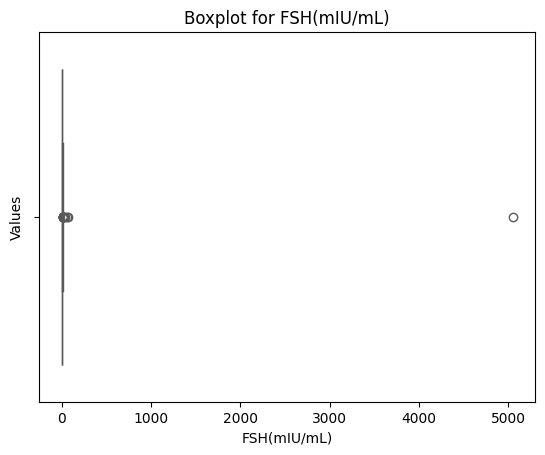

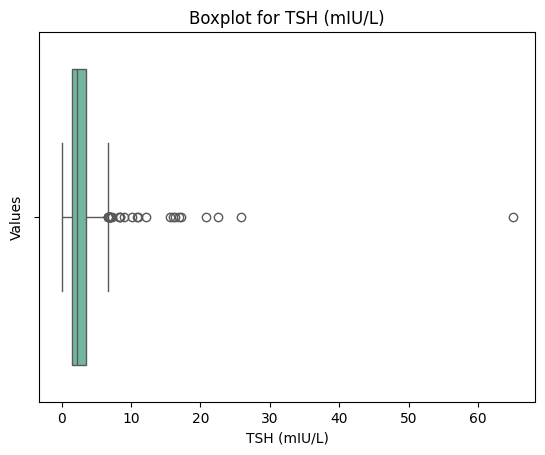

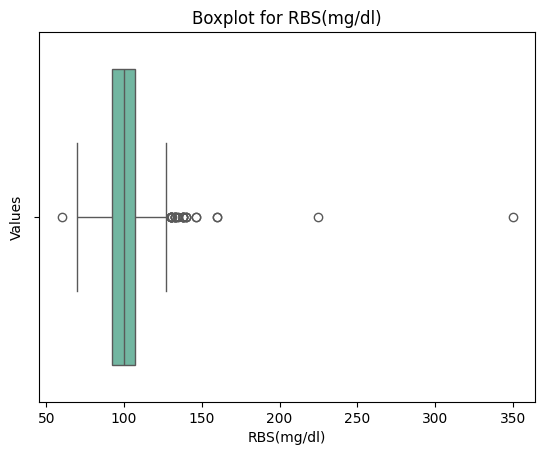

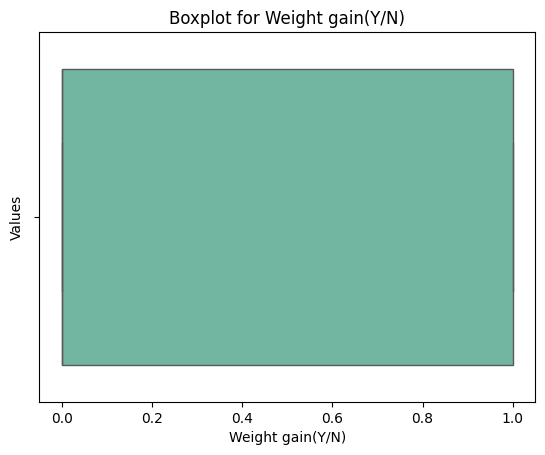

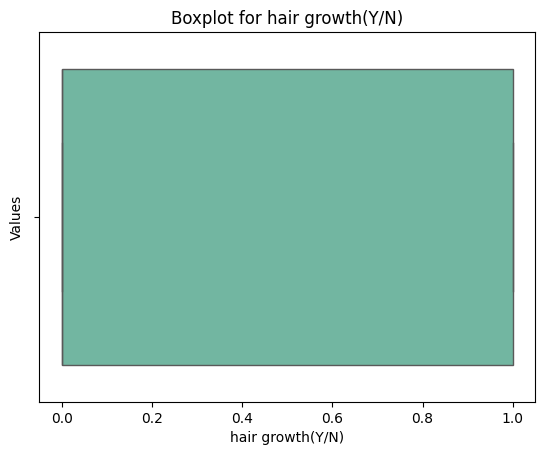

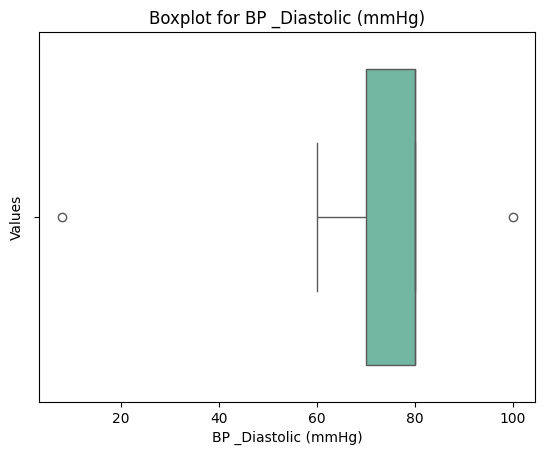

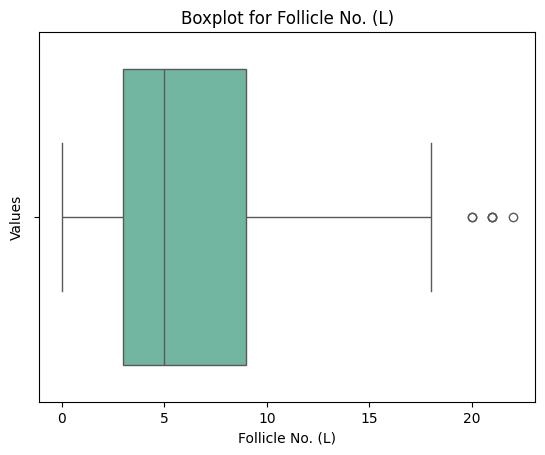

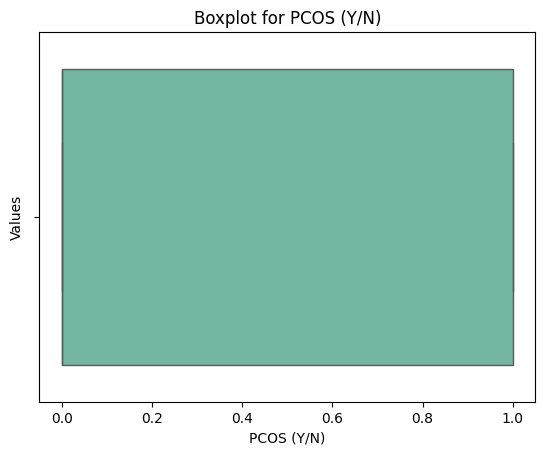

In [ ]:
columns_of_interest = ['Hb(g/dl)', 'Cycle(R/I)','FSH(mIU/mL)','TSH (mIU/L)','RBS(mg/dl)','Weight gain(Y/N)', 'hair growth(Y/N)','BP _Diastolic (mmHg)', 'Follicle No. (L)','PCOS (Y/N)']
# Create boxplots for the selected columns
plt.figure(figsize=(8, 6))
for column in columns_of_interest:
    sns.boxplot(x=data[column], orient="v", palette="Set2")
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

In [ ]:
import numpy as np

0.75    11.7
0.25    10.5
Name: Hb(g/dl), dtype: float64
11.7
10.5
1.1999999999999993
13.499999999999998
8.700000000000001


<Axes: ylabel='Hb(g/dl)'>

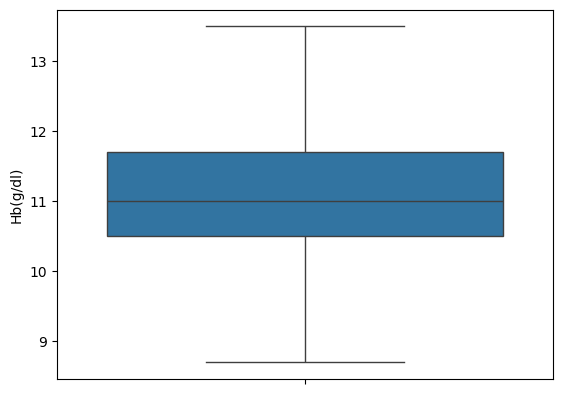

In [ ]:
quant=data['Hb(g/dl)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Hb(g/dl)']=np.where(data['Hb(g/dl)']>13.499999999999998,13.499999999999998,data['Hb(g/dl)'])
data['Hb(g/dl)']=np.where(data['Hb(g/dl)']<8.700000000000001,8.700000000000001,data['Hb(g/dl)'])
sns.boxplot(data['Hb(g/dl)'])

0.75    6.41
0.25    3.30
Name: FSH(mIU/mL), dtype: float64
6.41
3.3
3.1100000000000003
11.075000000000001
-1.365000000000001


<Axes: ylabel='FSH(mIU/mL)'>

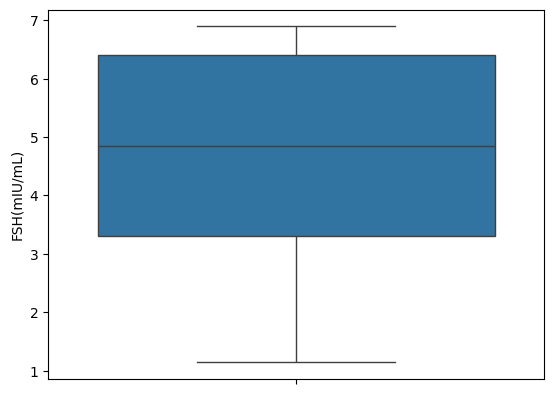

In [ ]:
quant=data['FSH(mIU/mL)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['FSH(mIU/mL)']=np.where(data['FSH(mIU/mL)']>6.897407285625,6.897407285625,data['FSH(mIU/mL)'])
data['FSH(mIU/mL)']=np.where(data['FSH(mIU/mL)']<1.1415556286249995,1.1415556286249995,data['FSH(mIU/mL)'])
sns.boxplot(data['FSH(mIU/mL)'])

0.75    3.57
0.25    1.48
Name: TSH (mIU/L), dtype: float64
3.57
1.48
2.09
6.705
-1.6549999999999998


<Axes: ylabel='TSH (mIU/L)'>

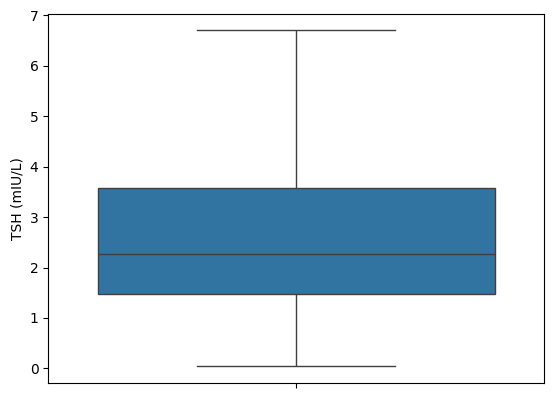

In [ ]:
quant=data['TSH (mIU/L)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['TSH (mIU/L)']=np.where(data['TSH (mIU/L)']>6.705,6.705,data['TSH (mIU/L)'])
data['TSH (mIU/L)']=np.where(data['TSH (mIU/L)']<-1.6549999999999998,-1.6549999999999998,data['TSH (mIU/L)'])
sns.boxplot(data['TSH (mIU/L)'])

0.75    107.0
0.25     92.0
Name: RBS(mg/dl), dtype: float64
107.0
92.0
15.0
129.5
69.5


<Axes: ylabel='RBS(mg/dl)'>

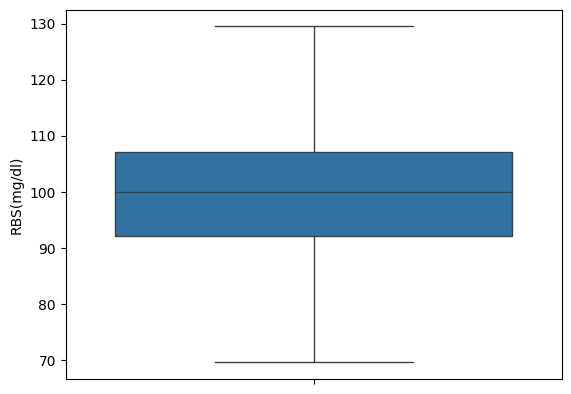

In [ ]:
quant=data['RBS(mg/dl)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['RBS(mg/dl)']=np.where(data['RBS(mg/dl)']>129.5,129.5,data['RBS(mg/dl)'])
data['RBS(mg/dl)']=np.where(data['RBS(mg/dl)']<69.5,69.5,data['RBS(mg/dl)'])
sns.boxplot(data['RBS(mg/dl)'])

0.75    80.0
0.25    70.0
Name: BP _Diastolic (mmHg), dtype: float64
80.0
70.0
10.0
95.0
55.0


<Axes: ylabel='BP _Diastolic (mmHg)'>

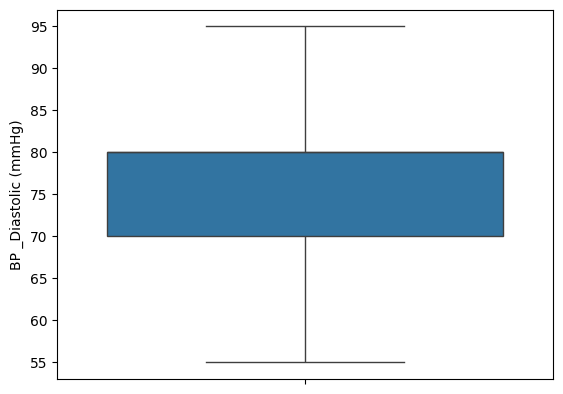

In [ ]:
quant=data['BP _Diastolic (mmHg)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['BP _Diastolic (mmHg)']=np.where(data['BP _Diastolic (mmHg)']>95.0,95.0,data['BP _Diastolic (mmHg)'])
data['BP _Diastolic (mmHg)']=np.where(data['BP _Diastolic (mmHg)']<55.0,55.0,data['BP _Diastolic (mmHg)'])
sns.boxplot(data['BP _Diastolic (mmHg)'])

0.75    9.0
0.25    3.0
Name: Follicle No. (L), dtype: float64
9.0
3.0
6.0
18.0
-6.0


<Axes: ylabel='Follicle No. (L)'>

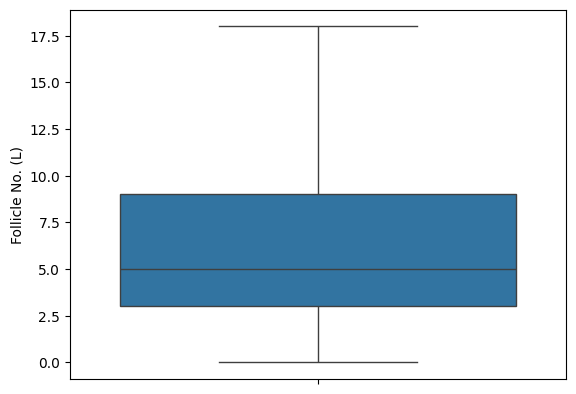

In [ ]:
quant=data['Follicle No. (L)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Follicle No. (L)']=np.where(data['Follicle No. (L)']>18.0,18.0,data['Follicle No. (L)'])
data['Follicle No. (L)']=np.where(data['Follicle No. (L)']<-6.0,-6.0,data['Follicle No. (L)'])
sns.boxplot(data['Follicle No. (L)'])

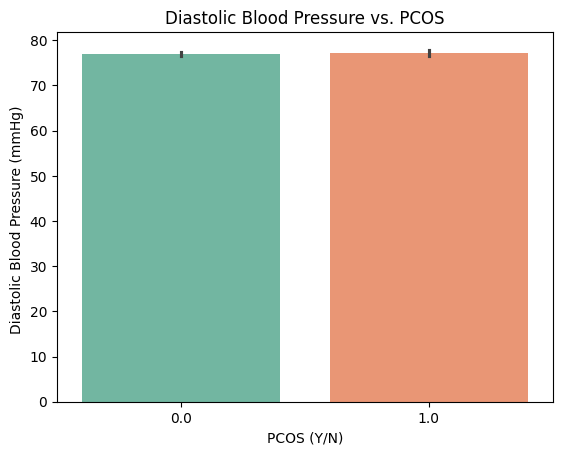

In [ ]:
sns.barplot(y='BP _Diastolic (mmHg)', x='PCOS (Y/N)', data=data, palette='Set2')

plt.xlabel('PCOS (Y/N)')
plt.ylabel('Diastolic Blood Pressure (mmHg) ')
plt.title('Diastolic Blood Pressure vs. PCOS')

plt.show()


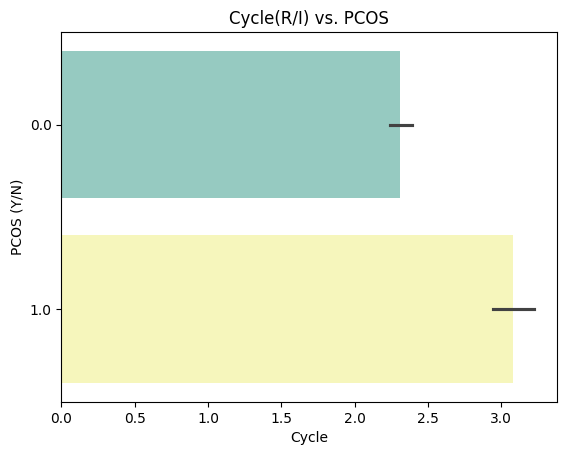

In [ ]:
sns.barplot(x='Cycle(R/I)', y='PCOS (Y/N)', data=data,orient='h',palette='Set3')

# Add labels and title
plt.xlabel('Cycle')
plt.ylabel('PCOS (Y/N)')
plt.title('Cycle(R/I) vs. PCOS')

# Show the plot
plt.show()

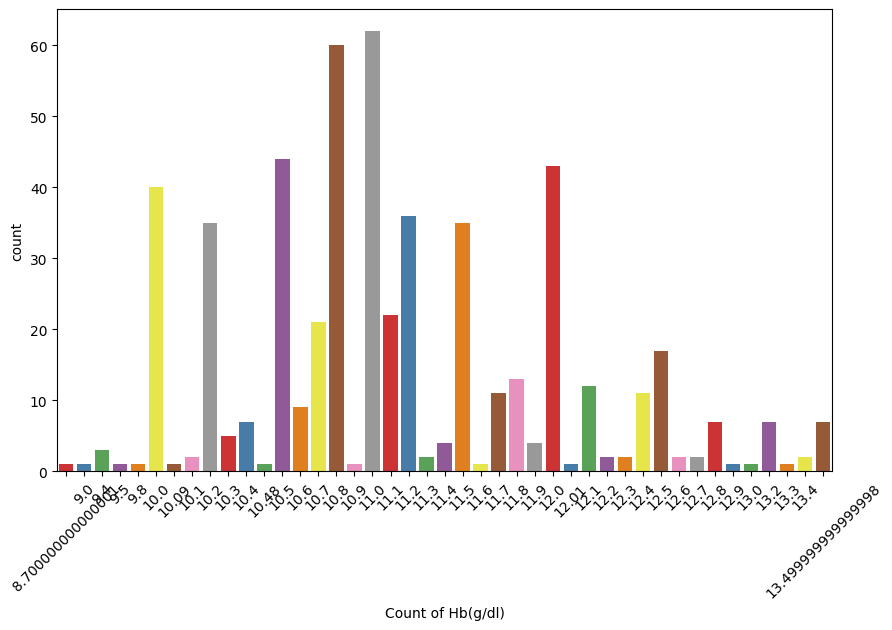

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the relevant columns
plt.figure(figsize=(10,6))
# Create the count plot
sns.countplot(x='Hb(g/dl)', data=data, palette='Set1')

# Add labels and title
plt.xlabel('Count of Hb(g/dl)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=data[['Hb(g/dl)','Cycle(R/I)','FSH(mIU/mL)','TSH (mIU/L)','RBS(mg/dl)','Weight gain(Y/N)', 'hair growth(Y/N)','BP _Diastolic (mmHg)', 'Follicle No. (L)']]
y=data["PCOS (Y/N)"]

#Splitting the data into test and training setsbar
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
y_train.value_counts()

0.0    287
1.0    145
Name: PCOS (Y/N), dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
xbal,ybal=smote.fit_resample(X_train,y_train)

In [ ]:
ybal.value_counts()

1.0    287
0.0    287
Name: PCOS (Y/N), dtype: int64

###LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)
reg_pred = reg_model.predict(X_test)

reg_acc_score = accuracy_score(y_test, reg_pred)

print("acc_score of model %.2f"%accuracy_score(y_test,reg_pred))

acc_score of model 0.88


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(reg_pred , y_test))


              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        84
         1.0       0.69      0.88      0.77        25

    accuracy                           0.88       109
   macro avg       0.82      0.88      0.85       109
weighted avg       0.90      0.88      0.89       109



###DecisionTreeClassifier

In [ ]:
model_ = DecisionTreeClassifier()
model_.fit(X_train, y_train)
dt_pred = model_.predict(X_test)

acc_score = accuracy_score(y_test, dt_pred)

print("acc_score of model %.2f"%accuracy_score(y_test,dt_pred))

acc_score of model 0.83


In [ ]:
print(classification_report(dt_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        80
         1.0       0.66      0.72      0.69        29

    accuracy                           0.83       109
   macro avg       0.78      0.79      0.78       109
weighted avg       0.83      0.83      0.83       109



#RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
my_model = rfc.fit(X_train, y_train)

#Making prediction and checking the test set
from sklearn.metrics import accuracy_score
pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8532110091743119


In [ ]:
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, pred_rfc)
print(classi_report)

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        77
         1.0       0.83      0.62      0.71        32

    accuracy                           0.85       109
   macro avg       0.85      0.79      0.81       109
weighted avg       0.85      0.85      0.85       109



#XGBoost

In [ ]:
import xgboost as xgb
model1=xgb.XGBClassifier().fit(X_train,y_train)
y_pred=model1.predict(X_test)
model1.score(X_test, y_test)

0.8532110091743119

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        85
           1       0.62      0.83      0.71        24

    accuracy                           0.85       109
   macro avg       0.79      0.85      0.81       109
weighted avg       0.88      0.85      0.86       109



#Prediction

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# For example, let's say you want to print data for the first row:
row_index = 540 # Index of the row you want to print

# Use .iloc[row_index] to access the row by index
row_data = X.iloc[row_index]

# Print all the columns data for the selected row
print(row_data)

Hb(g/dl)                 10.20
Cycle(R/I)                4.00
FSH(mIU/mL)               3.99
TSH (mIU/L)               1.66
RBS(mg/dl)              108.00
Weight gain(Y/N)          1.00
hair growth(Y/N)          1.00
BP _Diastolic (mmHg)     70.00
Follicle No. (L)          9.00
Name: 540, dtype: float64


#Logistic Regression Prediction

In [ ]:
print(reg_model.predict([[11.80,2.00,5.54,2.54,84.00,0.00,0.00,80.00,13.00]]))

[1.]


In [ ]:
print(reg_model.predict([[10.00,2.00,3.98,3.57,84.00,0.00,0.00,80.00,3.00]]))

[0.]


In [ ]:
print(reg_model.predict([[11.00,2.00,6.897407,1.11,92.00,0.00,0.00,70.00,1.00]]))

[0.]


In [ ]:
print(reg_model.predict([[10.20,4.00,3.99,1.66,108.00,1.00,1.00,70.00,9.00]]))

[1.]


#RFC Prediction

In [ ]:
print(rfc.predict([[11.80,2.00,5.54,2.54,84.00,0.00,0.00,80.00,13.00]]))

[1.]


In [ ]:
print(rfc.predict([[10.00,2.00,3.98,3.57,84.00,0.00,0.00,80.00,3.00]]))

[0.]


In [ ]:
print(rfc.predict([[11.00,2.00,6.897407,1.11,92.00,0.00,0.00,70.00,1.00]]))

[0.]


In [ ]:
print(rfc.predict([[10.20,4.00,3.99,1.66,108.00,1.00,1.00,70.00,9.00]]))

[1.]


#XGBoost

In [ ]:
print(model1.predict([[11.80,2.00,5.54,2.54,84.00,0.00,0.00,80.00,13.00]]))

[1]


In [ ]:
print(model1.predict([[10.00,2.00,3.98,3.57,84.00,0.00,0.00,80.00,3.00]]))

[0]


In [ ]:
print(model1.predict([[11.00,2.00,6.897407,1.11,92.00,0.00,0.00,70.00,1.00]]))

[0]


In [ ]:
print(model1.predict([[10.20,4.00,3.99,1.66,108.00,1.00,1.00,70.00,9.00]]))

[1]


#DT Classifier

In [ ]:
print(model_.predict([[11.80,2.00,5.54,2.54,84.00,0.00,0.00,80.00,13.00]]))

[1.]


In [ ]:
print(model_.predict([[10.00,2.00,3.98,3.57,84.00,0.00,0.00,80.00,3.00]]))

[0.]


In [ ]:
print(model_.predict([[11.00,2.00,6.897407,1.11,92.00,0.00,0.00,70.00,1.00]]))

[0.]


In [ ]:
print(model_.predict([[10.20,4.00,3.99,1.66,108.00,1.00,1.00,70.00,9.00]]))

[1.]


In [ ]:
import pickle
pickle.dump(model1,open("xb.pkl","wb"))